In [71]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import plotly.express as px


In [2]:
df_post = pd.read_csv('output/posts_output.csv')
df_news = pd.read_csv('output/news_output.csv')

In [3]:
print(df_post.dtypes)
print()
print(df_news.dtypes)

post_id            object
subreddit_id        int64
date_generated     object
date_inserted      object
title              object
subjectivity      float64
polarity          float64
dtype: object

news_id            object
subreddit_id        int64
date_generated     object
date_inserted      object
polarity          float64
dtype: object


In [4]:
gpt_post = df_post[df_post['subreddit_id'] == 1]
gpt_news = df_news[df_news['subreddit_id'] == 1]

In [5]:
gpt_post.head()

,post_id,subreddit_id,date_generated,date_inserted,title,subjectivity,polarity
0,655026de54a7246a1e6f98371,1,2023-11-11,2023-12-11 07:46:49,Join Talkie's AI Character Contest! 🎨 Prize Po...,0.000,0.000
1,655026de54a7246a1e6f983710,1,2023-11-11,2023-12-11 07:46:49,‘Motion Brush’ is new Runway Feature,0.455,0.136
2,655026de54a7246a1e6f98372,1,2023-11-11,2023-12-11 07:46:49,"Weekly Self-Promotional Mega Thread 7, 06.11.2...",0.000,0.000
3,655026de54a7246a1e6f98373,1,2023-11-11,2023-12-11 07:46:49,Literal movie titles,0.000,0.000
4,655026de54a7246a1e6f98374,1,2023-11-11,2023-12-11 07:46:49,Did this hammered in the back of an Uber. I'm ...,0.300,0.350


## Visualization
- Reddit Post: subjectivity vs polarity
- News polarity vs Reddit Post Polarity

### Word Cloud: Reddit Post

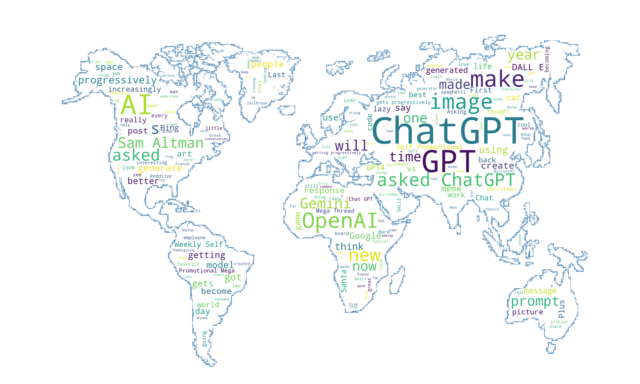

In [6]:
# Concatenate all the text in the column into a single string
text = ' '.join(gpt_post['title'])

# Load a mask image
mask_image_path = 'image/world_map.jpg' 
mask_image = np.array(Image.open(mask_image_path))

# The mask image provided is black on white, so we need to invert the image
# The words will fill the black area, which is represented by True in the mask
# We use np.invert for binary masks (black and white images)
mask_inverted = np.invert(mask_image[:, :, :3].mean(axis=2) > 128)

# Create a word cloud object
wc = WordCloud(background_color="white", 
               max_words=200, 
               mask=mask_image, 
               contour_width=1, 
               contour_color='steelblue')

# Generate the word cloud
wc.generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), frameon=False)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Joint Plot - Subjectivity vs Polarity

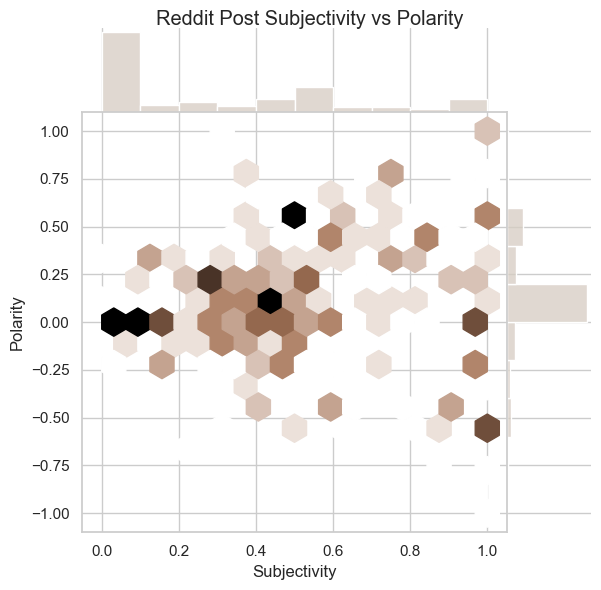

In [7]:
# Plot a joint plot using seaborn
sns.set_theme(style="whitegrid")
joint_plot = sns.jointplot(data=gpt_post, 
                           x='subjectivity', 
                           y='polarity', 
                           kind='hex', 
                           color='#d5bdaf', 
                           space=0, 
                           gridsize=16,
                           mincnt=1,
                           vmax=10,
                           marginal_kws=dict(bins=10, fill=True, color = '#d6ccc2'))



# Adding titles
joint_plot.fig.suptitle('Reddit Post Subjectivity vs Polarity')

# Adjusting axis labels with specified font size
joint_plot.set_axis_labels('Subjectivity', 'Polarity', fontsize=12)

# Adjust the figure to prevent the title from being cut off
joint_plot.fig.subplots_adjust(top=0.95)

# Show the plot
plt.show()

### Point Plot - News polarity vs Reddit Post Polarity

In [8]:
gpt_post.head()

,post_id,subreddit_id,date_generated,date_inserted,title,subjectivity,polarity
0,655026de54a7246a1e6f98371,1,2023-11-11,2023-12-11 07:46:49,Join Talkie's AI Character Contest! 🎨 Prize Po...,0.000,0.000
1,655026de54a7246a1e6f983710,1,2023-11-11,2023-12-11 07:46:49,‘Motion Brush’ is new Runway Feature,0.455,0.136
2,655026de54a7246a1e6f98372,1,2023-11-11,2023-12-11 07:46:49,"Weekly Self-Promotional Mega Thread 7, 06.11.2...",0.000,0.000
3,655026de54a7246a1e6f98373,1,2023-11-11,2023-12-11 07:46:49,Literal movie titles,0.000,0.000
4,655026de54a7246a1e6f98374,1,2023-11-11,2023-12-11 07:46:49,Did this hammered in the back of an Uber. I'm ...,0.300,0.350


In [9]:
gpt_news.head()

,news_id,subreddit_id,date_generated,date_inserted,polarity
0,6573d30484a37a3a395dd3651,1,2023-11-11,2023-12-11 07:46:51,0.000
1,6573d30484a37a3a395dd36510,1,2023-11-11,2023-12-11 07:46:51,0.050
2,6573d30484a37a3a395dd365100,1,2023-11-11,2023-12-11 07:46:51,0.187
3,6573d30484a37a3a395dd36511,1,2023-11-11,2023-12-11 07:46:51,0.200
4,6573d30484a37a3a395dd36512,1,2023-11-11,2023-12-11 07:46:51,0.000


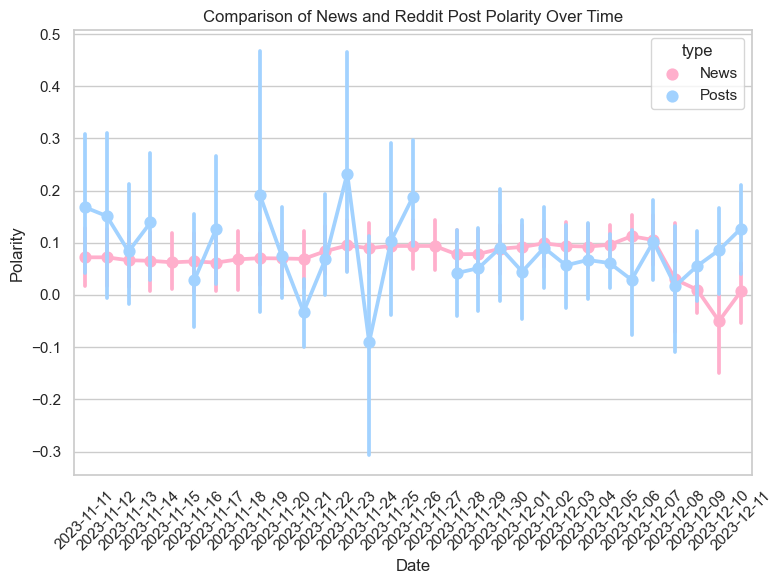

In [10]:
# Create DataFrames from the two tables
posts_polarity = pd.DataFrame({'date': gpt_post['date_generated'], 'polarity': gpt_post['polarity'], 'type': 'Posts'})
news_polarity = pd.DataFrame({'date': gpt_news['date_generated'], 'polarity': gpt_news['polarity'], 'type': 'News'})

# Combine the DataFrames
polarity_combined = pd.concat([news_polarity, posts_polarity ])

# Create a point plot
plt.figure(figsize=(8, 6))
news_color = '#a2d2ff'
post_color = "#ffafcc"
sns.pointplot(data=polarity_combined, x='date', y='polarity', hue='type', palette = [ post_color, news_color])


# Improve the aesthetics
plt.xticks(rotation=45)
plt.title('Comparison of News and Reddit Post Polarity Over Time')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.tight_layout()  # Adjust layout to fit the date labels

# Show the plot
plt.show()

In [13]:
gpt_news

,news_id,subreddit_id,date_generated,date_inserted,polarity
0,6573d30484a37a3a395dd3651,1,2023-11-11,2023-12-11 07:46:51,0.000
1,6573d30484a37a3a395dd36510,1,2023-11-11,2023-12-11 07:46:51,0.050
2,6573d30484a37a3a395dd365100,1,2023-11-11,2023-12-11 07:46:51,0.187
3,6573d30484a37a3a395dd36511,1,2023-11-11,2023-12-11 07:46:51,0.200
4,6573d30484a37a3a395dd36512,1,2023-11-11,2023-12-11 07:46:51,0.000
...,...,...,...,...,...
3145,6577b450da4479a392c0aa9b5,1,2023-12-11,2023-12-11 20:18:03,0.200
3146,6577b450da4479a392c0aa9b6,1,2023-12-11,2023-12-11 20:18:03,0.000
3147,6577b450da4479a392c0aa9b7,1,2023-12-11,2023-12-11 20:18:03,0.000
3148,6577b450da4479a392c0aa9b8,1,2023-12-11,2023-12-11 20:18:03,0.068


In [16]:
# get the average polarity of news of each date
avg_news_per_day = gpt_news.groupby('date_generated').agg({'polarity': 'mean'}).reset_index()
avg_news_per_day.head()

,date_generated,polarity
0,2023-11-11,0.07215
1,2023-11-12,0.07215
2,2023-11-13,0.06653
3,2023-11-14,0.06553
4,2023-11-15,0.06253


In [38]:
# load dataset for sentiment analysis
gpt_sentiment = gpt_post.merge(avg_news_per_day, on = 'date_generated', how = 'left')[['post_id', 'date_generated', 'title', 'subjectivity', 'polarity_y', 'polarity_x']]
gpt_sentiment.rename(columns = {'subjectivity':'subjectivity_post','polarity_y':'avg_polarity_news', 'polarity_x':'polarity_post'}, inplace = True)
gpt_sentiment['post_sentiment_class'] = np.where(
    (gpt_sentiment['polarity_post'] > 0.5) & (gpt_sentiment['polarity_post'] <= 1), 'very positive',
    np.where(
        (gpt_sentiment['polarity_post'] <= 0.5) & (gpt_sentiment['polarity_post'] > 0), 'positive',
        np.where(
            gpt_sentiment['polarity_post'] == 0, 'neutral',
            np.where(
                (gpt_sentiment['polarity_post'] >= -0.5) & (gpt_sentiment['polarity_post'] < 0), 'negative', 'very negative'
            )
        )
    )
)

# output first five rows
gpt_sentiment.head()

,post_id,date_generated,title,subjectivity_post,avg_polarity_news,polarity_post,post_sentiment_class
0,655026de54a7246a1e6f98371,2023-11-11,Join Talkie's AI Character Contest! 🎨 Prize Po...,0.000,0.07215,0.000,neutral
1,655026de54a7246a1e6f983710,2023-11-11,‘Motion Brush’ is new Runway Feature,0.455,0.07215,0.136,positive
2,655026de54a7246a1e6f98372,2023-11-11,"Weekly Self-Promotional Mega Thread 7, 06.11.2...",0.000,0.07215,0.000,neutral
3,655026de54a7246a1e6f98373,2023-11-11,Literal movie titles,0.000,0.07215,0.000,neutral
4,655026de54a7246a1e6f98374,2023-11-11,Did this hammered in the back of an Uber. I'm ...,0.300,0.07215,0.350,positive


In [39]:
# check for missing data
gpt_sentiment.isnull().sum()

post_id                 0
date_generated          0
title                   0
subjectivity_post       0
avg_polarity_news       0
polarity_post           0
post_sentiment_class    0
dtype: int64

In [52]:
# dimensionality of the data
gpt_sentiment.shape

(678, 7)

## Exploratory Data Analysis

### Plotting the distribution of title lengths

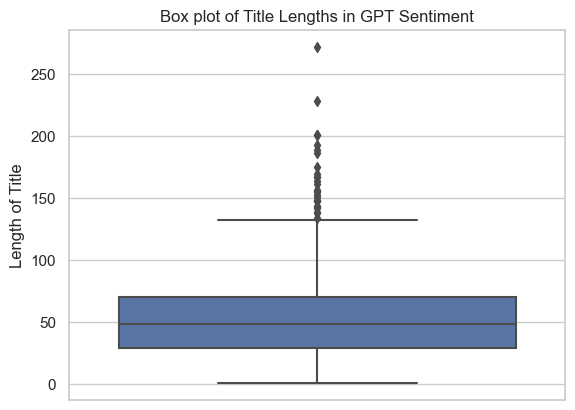

In [54]:
# Calculate the length of each title and store it in a new column
gpt_sentiment['title_length'] = gpt_sentiment['title'].apply(len)

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create the box plot
sns.boxplot(y='title_length', data=gpt_sentiment)

# Add title and labels (optional)
plt.title('Box plot of Title Lengths in GPT Sentiment')
plt.ylabel('Length of Title')

# Display the plot
plt.show()


### Plotting the distribution of sentiment class

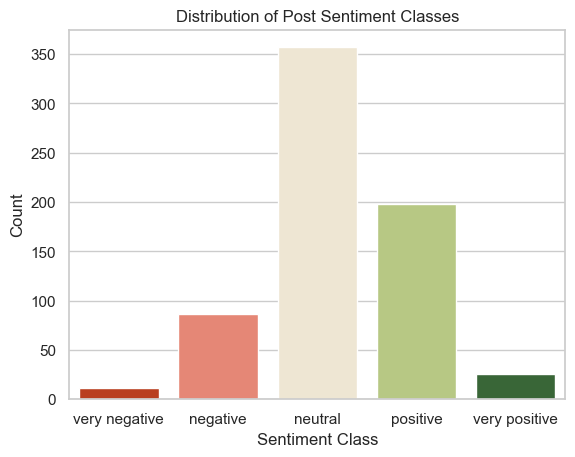

In [59]:
# distribution of each post sentiment class

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

color_palette = {
    "very negative": "#d32e05",  
    "negative": "#f87a63",      
    "neutral": "#f2e8cf",      
    "positive": "#bcd379",     
    "very positive": "#326e2f"  
}

# Create the bar plot
sns.countplot(x='post_sentiment_class', data=gpt_sentiment, palette=color_palette,
              order=['very negative', 'negative', 'neutral', 'positive', 'very positive'])

# Add title and labels (optional)
plt.title('Distribution of Post Sentiment Classes')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')

# Display the plot
plt.show()

In [76]:
gpt_sentiment = gpt_sentiment[['post_id', 'date_generated', 'title', 'title_length', 'subjectivity_post', 'avg_polarity_news', 'polarity_post', 'post_sentiment_class' ]]
gpt_sentiment.head()

,post_id,date_generated,title,title_length,subjectivity_post,avg_polarity_news,polarity_post,post_sentiment_class
0,655026de54a7246a1e6f98371,2023-11-11,Join Talkie's AI Character Contest! 🎨 Prize Po...,83,0.000,0.07215,0.000,neutral
1,655026de54a7246a1e6f983710,2023-11-11,‘Motion Brush’ is new Runway Feature,36,0.455,0.07215,0.136,positive
2,655026de54a7246a1e6f98372,2023-11-11,"Weekly Self-Promotional Mega Thread 7, 06.11.2...",62,0.000,0.07215,0.000,neutral
3,655026de54a7246a1e6f98373,2023-11-11,Literal movie titles,20,0.000,0.07215,0.000,neutral
4,655026de54a7246a1e6f98374,2023-11-11,Did this hammered in the back of an Uber. I'm ...,78,0.300,0.07215,0.350,positive


### Plotting the Pie chart of the percentage of each sentiment class

In [70]:
fig = px.pie(gpt_sentiment, names='post_sentiment_class', title='Pie chart of each sentiment class',
             color='post_sentiment_class', color_discrete_map=color_palette)

fig.show()

## Data Pre-processing

In [80]:
gpt_sentiment.head()

,post_id,date_generated,title,title_length,subjectivity_post,avg_polarity_news,polarity_post,post_sentiment_class
0,655026de54a7246a1e6f98371,2023-11-11,Join Talkie's AI Character Contest! 🎨 Prize Po...,83,0.000,0.07215,0.000,neutral
1,655026de54a7246a1e6f983710,2023-11-11,‘Motion Brush’ is new Runway Feature,36,0.455,0.07215,0.136,positive
2,655026de54a7246a1e6f98372,2023-11-11,"Weekly Self-Promotional Mega Thread 7, 06.11.2...",62,0.000,0.07215,0.000,neutral
3,655026de54a7246a1e6f98373,2023-11-11,Literal movie titles,20,0.000,0.07215,0.000,neutral
4,655026de54a7246a1e6f98374,2023-11-11,Did this hammered in the back of an Uber. I'm ...,78,0.300,0.07215,0.350,positive


In [ ]:
posts_polarity =  pd.DataFrame({'date':gpt_sentimentd['date_generated'], 'polarity': gpt_sentimentd['polarity_post'], 'type': 'Posts'})
news_polarity =  pd.DataFrame({'date':gpt_sentimentd['date_generated'], 'polarity': gpt_sentimentd['avg_polarity_news'], 'type': 'Posts'})


In [78]:
# Create DataFrames from the two tables
posts_polarity = pd.DataFrame({'date': gpt_post['date_generated'], 'polarity': gpt_post['polarity'], 'type': 'Posts'})
news_polarity = pd.DataFrame({'date': gpt_news['date_generated'], 'polarity': gpt_news['polarity'], 'type': 'News'})

# Combine the DataFrames
polarity_combined = pd.concat([news_polarity, posts_polarity ])



,date,polarity,type
0,2023-11-11,0.000,News
1,2023-11-11,0.050,News
2,2023-11-11,0.187,News
3,2023-11-11,0.200,News
4,2023-11-11,0.000,News
...,...,...,...
1145,2023-12-11,0.000,Posts
1146,2023-12-11,0.000,Posts
1147,2023-12-11,0.800,Posts
1148,2023-12-11,0.500,Posts


In [ ]:
[['post_id', 'date_generated', 'title', 'subjectivity', 'polarity_y', 'polarity_x']]
['news_id', 'subreddit_id', 'date_generated', 'date_inserted', 'polarity_x', 'polarity_y']

In [ ]:
['news_id', 'subreddit_id', 'date_generated', 'date_inserted','polarity']